In [9]:
import numpy as np
import h5py
from nbodykit.lab import *
import nbodykit 
import matplotlib.pyplot as plt
import scipy.integrate

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
MEDIUM_SIZE = 30
SMALL_SIZE = 22
SSSMALL_SIZE = 16

plt.rc('font', size=SSSMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE) 

In [23]:
def power_spectrum(filename, L_side=0):
    print(filename)
    f = h5py.File(filename, 'r')
    divergence = f['divergence'][...]
    f.close()

    cosmo = cosmology.Planck15    
    f = cosmo.scale_independent_growth_rate(0.0)
    
    delta = -divergence/(100 * cosmo.h)
        
    delta_mesh = nbodykit.source.mesh.array.ArrayMesh(delta, L_side) 
    r = FFTPower(delta_mesh, mode='1d', dk=0.005, kmin=0.005)
    Pk = r.power

    return {'k': Pk['k'], 'Pk':(Pk['power'].real- Pk.attrs['shotnoise'])}

In [24]:
path = "/Users/forero/data/AbacusCosmos/AbacusCosmos_720box_planck_00_00_FoF_halos_z0.100/fields/"
pk = {}
sigmas = [1.0, 3.0, 5.0, 7.0, 10.0]
for sigma in sigmas:
    filename = "velocity_AbacusCosmos_720box_planck_00_0_FoF_vmax_300.0_sigma_{:.1f}_nside_360.hdf5".format(sigma)
    pk["300_{:.1f}".format(sigma)] = power_spectrum(path+filename, L_side=720.0)

/Users/forero/data/AbacusCosmos/AbacusCosmos_720box_planck_00_00_FoF_halos_z0.100/fields/velocity_AbacusCosmos_720box_planck_00_0_FoF_vmax_300.0_sigma_1.0_nside_360.hdf5
/Users/forero/data/AbacusCosmos/AbacusCosmos_720box_planck_00_00_FoF_halos_z0.100/fields/velocity_AbacusCosmos_720box_planck_00_0_FoF_vmax_300.0_sigma_3.0_nside_360.hdf5
/Users/forero/data/AbacusCosmos/AbacusCosmos_720box_planck_00_00_FoF_halos_z0.100/fields/velocity_AbacusCosmos_720box_planck_00_0_FoF_vmax_300.0_sigma_5.0_nside_360.hdf5
/Users/forero/data/AbacusCosmos/AbacusCosmos_720box_planck_00_00_FoF_halos_z0.100/fields/velocity_AbacusCosmos_720box_planck_00_0_FoF_vmax_300.0_sigma_7.0_nside_360.hdf5
/Users/forero/data/AbacusCosmos/AbacusCosmos_720box_planck_00_00_FoF_halos_z0.100/fields/velocity_AbacusCosmos_720box_planck_00_0_FoF_vmax_300.0_sigma_10.0_nside_360.hdf5


In [4]:
path = "/Users/forero/data/AbacusCosmos/AbacusCosmos_720box_planck_00_00_FoF_halos_z0.100/fields/"
vels = [125.0, 180.0, 300.0]
for vel in vels:
    filename = "velocity_AbacusCosmos_720box_planck_00_0_FoF_vmax_{:.1f}_sigma_3.0_nside_360.hdf5".format(vel)
    pk["{}_3.0".format(int(vel))] = power_spectrum(path+filename, L_side=720.0)

/Users/forero/data/AbacusCosmos/AbacusCosmos_720box_planck_00_00_FoF_halos_z0.100/fields/velocity_AbacusCosmos_720box_planck_00_0_FoF_vmax_125.0_sigma_3.0_nside_360.hdf5
/Users/forero/data/AbacusCosmos/AbacusCosmos_720box_planck_00_00_FoF_halos_z0.100/fields/velocity_AbacusCosmos_720box_planck_00_0_FoF_vmax_180.0_sigma_3.0_nside_360.hdf5
/Users/forero/data/AbacusCosmos/AbacusCosmos_720box_planck_00_00_FoF_halos_z0.100/fields/velocity_AbacusCosmos_720box_planck_00_0_FoF_vmax_300.0_sigma_3.0_nside_360.hdf5


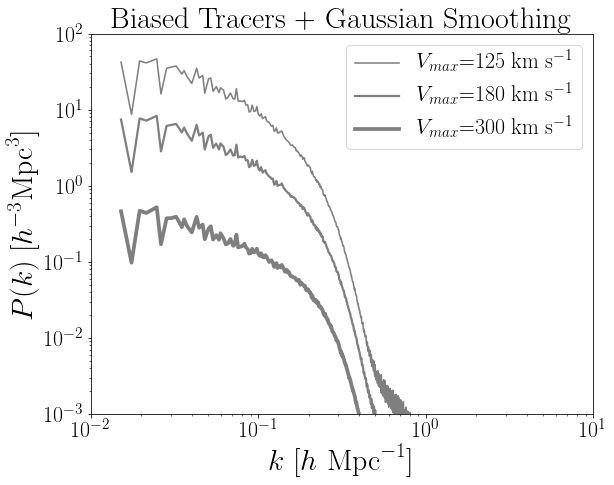

In [5]:
plt.figure(figsize=(9,7))

vels = [125.0, 180.0, 300.0]
for vel in vels:
    plt.loglog(pk["{}_3.0".format(int(vel))]['k'], 
               pk["{}_3.0".format(int(vel))]['Pk'], 
               label="$V_{{max}}$={:.0f} km s$^{{-1}}$".format(vel),
               linewidth=vel/80.0, color='black', alpha=0.5)

# format the axes
plt.xlabel(r"$k$ [$h \ \mathrm{Mpc}^{-1}$]")
plt.ylabel(r"$P(k)$ [$h^{-3}\mathrm{Mpc}^3$]")
plt.legend(fontsize=SMALL_SIZE)
plt.xlim(1E-2, 10.0)
plt.ylim(1E-3, 1E2)
plt.title("Biased Tracers + Gaussian Smoothing ")

plt.savefig("plot_power_spectrum_tracers_vmax.pdf", bbox_inches='tight')

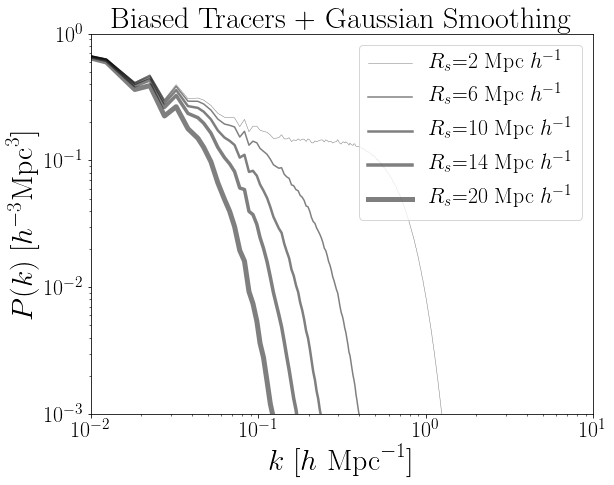

In [163]:
plt.figure(figsize=(9,7))

sigmas = [1.0, 3.0, 5.0, 7.0, 10.0]
for sigma in sigmas:
    plt.loglog(pk['300_{:.1f}'.format(sigma)]['k'], 
               pk['300_{:.1f}'.format(sigma)]['Pk'], 
               label="$R_s$={:.0f} Mpc $h^{{-1}}$".format(2*sigma),
               linewidth=sigma/2.0, color='black', alpha=0.5)

# format the axes
plt.xlabel(r"$k$ [$h \ \mathrm{Mpc}^{-1}$]")
plt.ylabel(r"$P(k)$ [$h^{-3}\mathrm{Mpc}^3$]")
plt.legend(fontsize=SMALL_SIZE, loc=1)
plt.xlim(1E-2, 10.0)
plt.ylim(1E-3,1E0)
plt.title("Biased Tracers + Gaussian Smoothing")
plt.savefig("plot_power_spectrum_tracers_rs.pdf", bbox_inches='tight')

In [36]:
path = "/Users/forero/github/WatershedAbacus/nb/"
sigmas = [1.0, 3.0, 5.0, 7.0, 10.0]
for sigma in sigmas:
    filename = "mock_divergence_mesh_360_box_720_slim_{}.h5".format(int(2.0*sigma))
    pk["mock_720_{:.1f}".format(sigma)] = power_spectrum(path+filename, L_side=720.0)

/Users/forero/github/WatershedAbacus/nb/mock_divergence_mesh_360_box_720_slim_2.h5
/Users/forero/github/WatershedAbacus/nb/mock_divergence_mesh_360_box_720_slim_6.h5
/Users/forero/github/WatershedAbacus/nb/mock_divergence_mesh_360_box_720_slim_10.h5
/Users/forero/github/WatershedAbacus/nb/mock_divergence_mesh_360_box_720_slim_14.h5
/Users/forero/github/WatershedAbacus/nb/mock_divergence_mesh_360_box_720_slim_20.h5


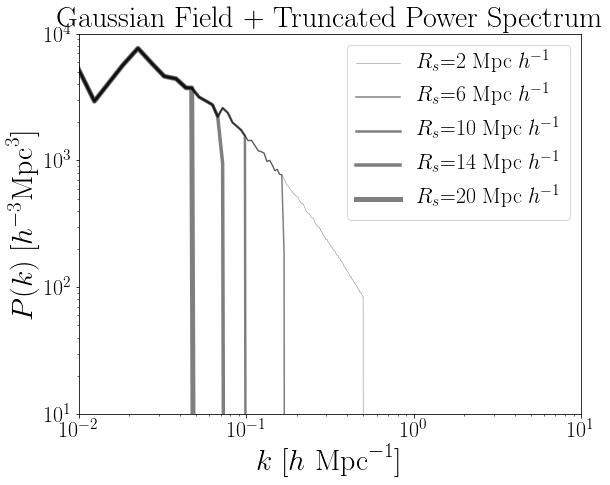

In [164]:
plt.figure(figsize=(9,7))

sigmas = [1.0, 3.0, 5.0, 7.0, 10.0]
for sigma in sigmas:
    plt.loglog(pk['mock_720_{:.1f}'.format(sigma)]['k'], 
               pk['mock_720_{:.1f}'.format(sigma)]['Pk'], 
               label="$R_s$={:.0f} Mpc $h^{{-1}}$".format(2*sigma), 
              linewidth=sigma/2.0, color='black', alpha=0.5)


# format the axes
plt.xlabel(r"$k$ [$h \ \mathrm{Mpc}^{-1}$]")
plt.ylabel(r"$P(k)$ [$h^{-3}\mathrm{Mpc}^3$]")
plt.legend(fontsize=SMALL_SIZE, loc=1)
plt.xlim(1E-2, 10.0)
plt.ylim(1E1,1E4)
plt.title("Gaussian Field + Truncated Power Spectrum")
plt.savefig("plot_power_spectrum_field_rs.pdf", bbox_inches='tight')

In [213]:
def corr_func(Pk, k):
    r = 1.0/k[1:-1]
    cf = np.zeros(len(r))
    print(len(r))
    for i in range(len(r)):
        y = Pk[1:-1] * (k[1:-1]**2) * np.sin(k[1:-1]*r[i])/(k[1:-1]*r[i])
        x = k[1:-1]
        cf[i] = scipy.integrate.simps(y, x)
    cf = cf/(2.0*np.pi**2)
    
    i_min = np.argmin(np.abs(cf-cf[-1]*0.77))
    half_r = r[i_min]
    sigma_half_r = np.abs(r[i_min+1]-r[i_min-1])
    print(cf[-1], cf[0], half_r)
    return {'cf':cf, 'r':r, 'half_r':half_r,'sigma_half_r':sigma_half_r}

In [214]:
cf = {}
for k in pk.keys():
    cf[k] = corr_func(pk[k]['Pk'], pk[k]['k'])

311
0.0008431419531018423 2.4979237140361907e-08 1.9513034599582832
311
1.9928858556994666e-05 1.381830271143907e-08 5.631007623611835
311
4.8385283076971215e-06 1.3017717291796225e-08 8.87476684001175
311
2.1718442826963784e-06 1.64563920684584e-08 10.784924185253253
311
1.0122666093143216e-06 3.045898429149441e-08 8.87476684001175
311
0.4568413321626807 0.0005132439364684804 4.041481373987286
311
0.10062565800733783 -0.0003776990669194854 10.78492426074856
311
0.041380610352524216 0.0005648595943582174 17.479932136252884
311
0.02016181656588956 -0.0008994139578122872 23.00188839868827
311
0.009325718464612474 0.0009922119165422937 31.005224697065376


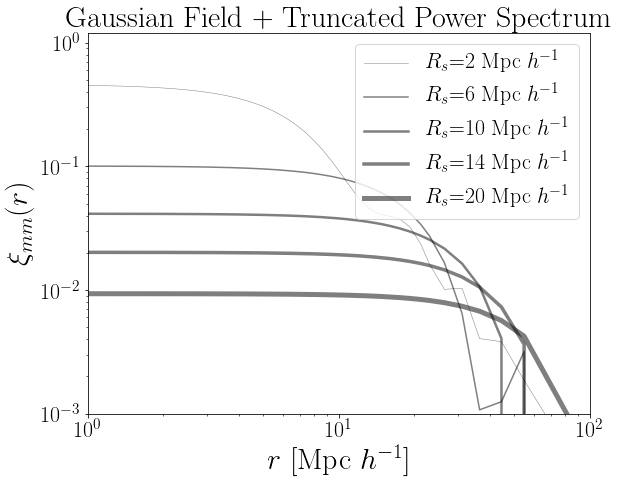

In [215]:
plt.figure(figsize=(9,7))

sigmas = [1.0, 3.0, 5.0, 7.0, 10.0]
for sigma in sigmas:
    plt.loglog(cf['mock_720_{:.1f}'.format(sigma)]['r'], 
               cf['mock_720_{:.1f}'.format(sigma)]['cf'], 
               label="$R_s$={:.0f} Mpc $h^{{-1}}$".format(2*sigma), 
              linewidth=sigma/2.0, color='black', alpha=0.5)


# format the axes
plt.xlabel(r"$r$ [$\mathrm{Mpc}\ h^{-1}$]")
plt.ylabel(r"$\xi_{mm}(r)$")
plt.legend(fontsize=SMALL_SIZE, loc=1)
plt.xlim(1.0, 1E2)
plt.ylim(1E-3,1.2E0)
plt.title("Gaussian Field + Truncated Power Spectrum")
plt.savefig("plot_corrfunc_field_rs.pdf", bbox_inches='tight')

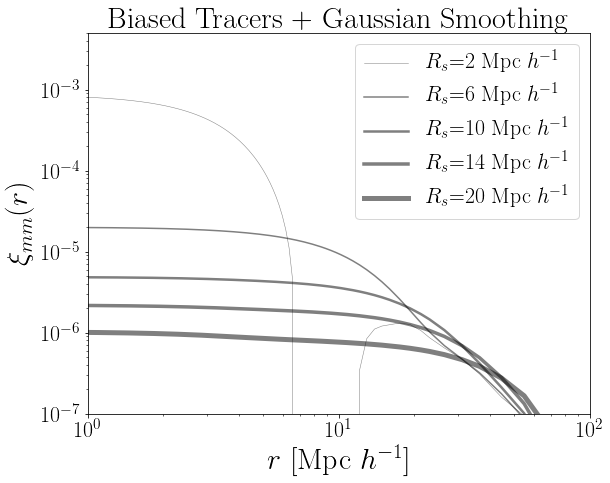

In [216]:
plt.figure(figsize=(9,7))

sigmas = [1.0, 3.0, 5.0, 7.0, 10.0]
for sigma in sigmas:
    plt.loglog(cf['300_{:.1f}'.format(sigma)]['r'], 
               cf['300_{:.1f}'.format(sigma)]['cf'], 
               label="$R_s$={:.0f} Mpc $h^{{-1}}$".format(2*sigma),
               linewidth=sigma/2.0, color='black', alpha=0.5)

# format the axes
plt.xlabel(r"$r$ [$\mathrm{Mpc}\ h^{-1}$]")
plt.ylabel(r"$\xi_{mm}(r)$")
plt.legend(fontsize=SMALL_SIZE, loc=1)
plt.xlim(1, 1E2)
plt.ylim(1E-7,5E-3)
plt.title("Biased Tracers + Gaussian Smoothing")
plt.savefig("plot_corrfunc_tracers_rs.pdf", bbox_inches='tight')

In [217]:
for k in cf.keys():
    print(k, cf[k]['half_r'], cf[k]['sigma_half_r'])

300_1.0 1.9513034599582832 0.03809333494948075
300_3.0 5.631007623611835 0.30994352435491557
300_5.0 8.87476684001175 0.840053714706432
300_7.0 10.784924185253253 1.169924536482812
300_10.0 8.87476684001175 0.840053714706432
mock_720_1.0 4.041481373987286 0.1621583125889896
mock_720_3.0 10.78492426074856 1.1699245745076112
mock_720_5.0 17.479932136252884 3.2723162271543096
mock_720_7.0 23.00188839868827 5.118048261470662
mock_720_10.0 31.005224697065376 10.050901285572806


In [218]:
half_r_sim = []
half_r_mock = []
sigma_half_r_sim = []
sigma_half_r_mock = []

sigmas = [1.0, 3.0, 5.0, 7.0, 10.0]
for sigma in sigmas:
    half_r_mock.append(cf["mock_720_{:.1f}".format(sigma)]["half_r"])
    half_r_sim.append(cf["300_{:.1f}".format(sigma)]["half_r"])
    sigma_half_r_sim.append(cf["300_{:.1f}".format(sigma)]["sigma_half_r"])
    sigma_half_r_mock.append(cf["mock_720_{:.1f}".format(sigma)]["sigma_half_r"])

    
half_r_mock = np.array(half_r_mock)
half_r_sim = np.array(half_r_sim)
sigma_half_r_sim = np.array(sigma_half_r_sim)
sigma_half_r_mock = np.array(sigma_half_r_mock)

sigma_vals = 2.0*np.array(sigmas)

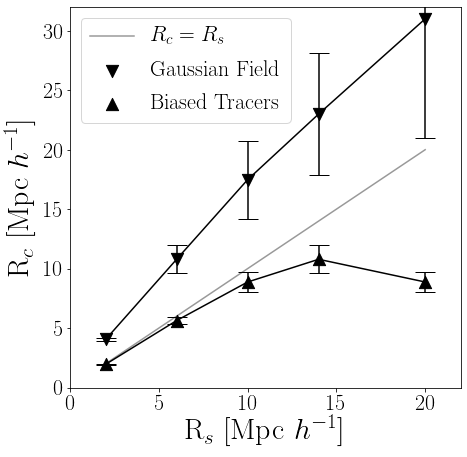

In [219]:
plt.figure(figsize=(7,7))

plt.scatter(sigma_vals, half_r_mock, marker="v", s=150, label="Gaussian Field", color='black')
#plt.plot(sigma_vals, half_r_mock, color='black')
plt.errorbar(sigma_vals, half_r_mock, yerr=sigma_half_r_mock, color='black', capsize=10)


plt.scatter(sigma_vals, half_r_sim, marker="^", s=150, label="Biased Tracers", color='black')
#plt.plot(sigma_vals, half_r_sim, color='black')
plt.errorbar(sigma_vals, half_r_sim, yerr=sigma_half_r_sim, color='black', capsize=10)


plt.plot(sigma_vals, sigma_vals, color='black', label='$R_{c}=R_{s}$', alpha=0.4)

#plt.semilogy()
plt.xlim(0,22)
plt.ylim(0,32)
plt.legend(fontsize=SMALL_SIZE)
plt.xlabel(r"R$_s$ [$\mathrm{Mpc}\ h^{-1}$]")
plt.ylabel(r"R$_c$ [$\mathrm{Mpc}\ h^{-1}$]")
plt.savefig("correlation_length.pdf", bbox_inches='tight')

In [220]:
#https://cluster-toolkit.readthedocs.io/en/latest/source/correlation_functions.html